# mnist LSTM 双向循环


mnist 是一个手写字体库， 每张图片都是 28*28大小的数字图片， 包括从0-9 10个字符。

把每一行做为一个序列， 使用双向LSTM进行训练


下载数据集  https://dikers-data.s3.cn-northwest-1.amazonaws.com.cn/dataset/mnist-original.mat

把数据下载到 ./datasets/mldata/mnist-original.mat

```
mkdir datasets/
cd datasets
mkdir mldata
cd mldata
wget https://dikers-data.s3.cn-northwest-1.amazonaws.com.cn/dataset/mnist-original.mat
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)


Using TensorFlow backend.


## 数据的生成

In [2]:
mnist = datasets.fetch_mldata('MNIST original', data_home='./datasets')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
 


n = len(mnist.data)
N = 30000  # 选取部分MNIST数据进行实验
N_train = 20000
N_validation = 4000
indices = np.random.permutation(range(n))[:N]  # 随机选择N个数据

X = mnist.data[indices]
X = X / 255.0
X = X - X.mean(axis=1).reshape(len(X), 1)
X = X.reshape(len(X), 28, 28)  # 转换为时间序列数据
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 转换为1-of-K形式

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, train_size=N_train)

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=N_validation)

print(X_train.shape)
print(Y_train.shape)

(16000, 28, 28)
(16000, 10)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


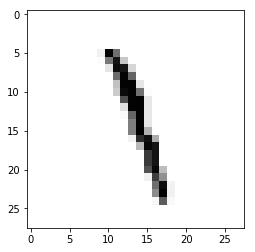

In [4]:
img = X_train[0].reshape(28, 28)
plt.imshow(img, cmap='Greys', interpolation='nearest')

## 模型的设置

In [9]:

n_in = 28
n_time = 28
n_hidden = 128
n_out = 10


def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()

# 双向LSTM  Bidirectional
model.add(Bidirectional(LSTM(n_hidden),
                        input_shape=(n_time, n_in)))
# , kernel_initializer=weight_variable)
model.add(Dense(n_out))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])





## 模型的训练

In [14]:
epochs = 30
batch_size = 128
hist = model.fit(X_train, Y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])


Train on 16000 samples, validate on 4000 samples
Epoch 1/30
16000/16000 [==============================] - 7s 466us/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.1064 - val_accuracy: 0.9672
Epoch 2/30
16000/16000 [==============================] - 8s 478us/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0968 - val_accuracy: 0.9735
Epoch 3/30
16000/16000 [==============================] - 7s 466us/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0999 - val_accuracy: 0.9703
Epoch 4/30
16000/16000 [==============================] - 7s 466us/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.1098 - val_accuracy: 0.9700
Epoch 5/30
16000/16000 [==============================] - 7s 466us/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.1163 - val_accuracy: 0.9703
Epoch 6/30
16000/16000 [==============================] - 7s 467us/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.1069 - val_accuracy: 0.9722
Epoch 7/30
16000/16000 [==============================] - 7s 46

In [15]:
print(hist.history['val_accuracy'])

[0.9672499895095825, 0.9735000133514404, 0.9702500104904175, 0.9700000286102295, 0.9702500104904175, 0.9722499847412109, 0.9750000238418579, 0.9777500033378601, 0.9779999852180481, 0.9760000109672546, 0.9737499952316284, 0.9677500128746033, 0.9737499952316284, 0.9785000085830688, 0.9779999852180481, 0.9735000133514404, 0.9742500185966492, 0.9754999876022339, 0.9712499976158142, 0.9764999747276306, 0.972000002861023, 0.9727500081062317, 0.9722499847412109, 0.9797499775886536]


## 训练进度情况可视化

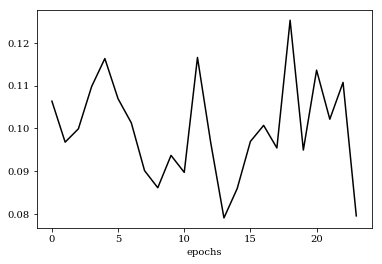

In [16]:
acc = hist.history['val_accuracy']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss,
         label='loss', color='black')
plt.xlabel('epochs')
plt.show()


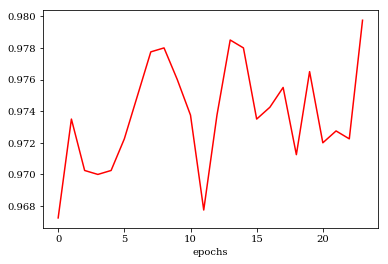

In [ ]:
plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(acc)), acc,
         label='acc', color='red')
plt.xlabel('epochs')
plt.show()


## 评估预测精度

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)